In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
#funcion delete
def delete_column(df, column_name):
    del df[column_name]
    return "column deleted"

## Import train DF

In [3]:
def conection(database):
    connection = create_engine("sqlite:///"+ database).connect()
    return connection
con = conection("../files/diamonds_train.db")

In [4]:
def query_diamond(query):
    df_diamonds_full_train = pd.read_sql_query(query,con)
    return df_diamonds_full_train

query_diamonds_full_train = '''
SELECT 
    d_prop.index_id,
    
    d_tran.carat,
    d_cut.cut,
    d_col.color,
    d_clar.clarity,

    d_dim.depth,
    d_dim.'table',
    d_dim.x,
    d_dim.y,
    d_dim.z,
    
    d_city.city,

    d_tran.price
    
FROM diamonds_properties as d_prop
    INNER JOIN diamonds_clarity as d_clar ON d_prop.clarity_id = d_clar.clarity_id
    INNER JOIN diamonds_color as d_col ON d_prop.color_id = d_col.color_id
    INNER JOIN diamonds_cut as d_cut ON d_prop.cut_id = d_cut.cut_id
    INNER JOIN diamonds_dimensions as d_dim ON d_prop.index_id = d_dim.index_id
    INNER JOIN diamonds_transactional as d_tran ON d_prop.index_id = d_tran.index_id
    INNER JOIN diamonds_city as d_city ON d_tran.city_id = d_city.city_id
'''

df_diamonds_train = query_diamond(query_diamonds_full_train)

In [5]:
df_diamonds_train.head()

,index_id,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,Dubai,4268
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,Kimberly,505
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,Las Vegas,2686
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,Kimberly,738
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,Dubai,4882


In [6]:
df_diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   carat     40455 non-null  float64
 2   cut       40455 non-null  object 
 3   color     40455 non-null  object 
 4   clarity   40455 non-null  object 
 5   depth     40455 non-null  float64
 6   table     40455 non-null  float64
 7   x         40455 non-null  float64
 8   y         40455 non-null  float64
 9   z         40455 non-null  float64
 10  city      40455 non-null  object 
 11  price     40455 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


## Import test DF

In [7]:
def import_csv_diamonds(location):
    df_diamonds_test = pd.read_csv(location)
    return df_diamonds_test

df_diamonds_test = import_csv_diamonds("../files/diamonds_test.csv")

In [8]:
df_diamonds_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam


In [9]:
df_diamonds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
 10  city     13485 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


## EDA

### TRAIN DF

#### a) category type

In [10]:
train_categorical_columns = ["cut","color","clarity"]

In [11]:
def df_columns_to_categorical_dtype(columns):
    df_diamonds_train_categorical_columns = df_diamonds_train[columns].astype("category")
    return df_diamonds_train_categorical_columns

df_diamonds_train_categorical_columns = df_columns_to_categorical_dtype(train_categorical_columns)

In [12]:
df_diamonds_train_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cut      40455 non-null  category
 1   color    40455 non-null  category
 2   clarity  40455 non-null  category
dtypes: category(3)
memory usage: 119.6 KB


In [13]:
df_diamonds_train_categorical_columns.head()

,cut,color,clarity
0,Premium,J,VS2
1,Very Good,H,VS2
2,Fair,G,VS1
3,Good,D,SI1
4,Ideal,G,SI1


#### b) encoding categorical columns

In [14]:
def enconding_categorical_columns(df, columns):
    enconding_categorical_columns = pd.get_dummies(df, columns=columns)
    return enconding_categorical_columns

enconding_categorical_columns_train = enconding_categorical_columns(df_diamonds_train_categorical_columns, train_categorical_columns)
enconding_categorical_columns_train.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


 #### c) numeric columns

In [15]:
numeric_columns_train = ["carat","depth","table","x","y","z","price"]

In [16]:
df_diamonds_train_numeric = df_diamonds_train[numeric_columns_train]
df_diamonds_train_numeric.head()

,carat,depth,table,x,y,z,price
0,1.21,62.4,58.0,6.83,6.79,4.25,4268
1,0.32,63.0,57.0,4.35,4.38,2.75,505
2,0.71,65.5,55.0,5.62,5.53,3.65,2686
3,0.41,63.8,56.0,4.68,4.72,3.00,738
4,1.02,60.5,59.0,6.55,6.51,3.95,4882


In [17]:
df_diamonds_train_concat = pd.concat([df_diamonds_train_numeric,enconding_categorical_columns_train], axis=1)
df_diamonds_train_concat.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,62.4,58.0,6.83,6.79,4.25,4268,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.32,63.0,57.0,4.35,4.38,2.75,505,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.71,65.5,55.0,5.62,5.53,3.65,2686,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.41,63.8,56.0,4.68,4.72,3.00,738,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1.02,60.5,59.0,6.55,6.51,3.95,4882,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#### d) FEATURE SELECTION - drop columns highly correlated

In [18]:
"""vamos a asumir temporalmente la alta correlacion de x,y,z con depth y table"""

'vamos a asumir temporalmente la alta correlacion de x,y,z con depth y table'

In [19]:
delete_column(df_diamonds_train_concat, "x")
delete_column(df_diamonds_train_concat, "y")
delete_column(df_diamonds_train_concat, "z")

'column deleted'

In [20]:
df_diamonds_train_concat.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,62.4,58.0,4268,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.32,63.0,57.0,505,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.71,65.5,55.0,2686,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.41,63.8,56.0,738,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1.02,60.5,59.0,4882,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### e) FEATURE ENGINEERING - group values - bins

### g) X_train, y_train

In [21]:
X_train = df_diamonds_train_concat.copy()

In [22]:
delete_column(X_train, "price")

'column deleted'

In [23]:
X_train.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,62.4,58.0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.32,63.0,57.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.71,65.5,55.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.41,63.8,56.0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1.02,60.5,59.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


####  scaling - X_train

In [24]:
X_train_columns = X_train[["carat","depth","table"]].columns.tolist()
X_train_columns

['carat', 'depth', 'table']

In [25]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler

In [26]:
train_scaled = StandardScaler()

In [27]:
train_scaled_fit = train_scaled.fit_transform(X_train[["carat","depth","table"]])

In [28]:
X_train_scaled = pd.DataFrame(train_scaled_fit, columns = X_train_columns)

In [29]:
X_train_scaled.head()

,carat,depth,table
0,0.867006,0.452019,0.247981
1,-1.004557,0.871099,-0.199745
2,-0.184434,2.617265,-1.095198
3,-0.815298,1.429872,-0.647472
4,0.467458,-0.875068,0.695707


In [30]:
X_train_scaled_concat = pd.concat([X_train_scaled,enconding_categorical_columns_train], axis=1)
X_train_scaled_concat.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.867006,0.452019,0.247981,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.004557,0.871099,-0.199745,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.184434,2.617265,-1.095198,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.815298,1.429872,-0.647472,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.467458,-0.875068,0.695707,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
delete_column(X_train_scaled_concat, "depth")
delete_column(X_train_scaled_concat, "table")

'column deleted'

In [32]:
X_train_scaled_concat.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.867006,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.004557,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.184434,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-0.815298,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.467458,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#### y_train

In [33]:
y_train = df_diamonds_train_concat["price"]

In [34]:
y_train.head()

0    4268
1     505
2    2686
3     738
4    4882
Name: price, dtype: int64

### TEST DF

#### a) category type

In [35]:
test_categorical_columns = ["cut","color","clarity"]

In [36]:
def df_columns_to_categorical_dtype(columns):
    df_diamonds_test_categorical_columns = df_diamonds_test[columns].astype("category")
    return df_diamonds_test_categorical_columns

df_diamonds_test_categorical_columns = df_columns_to_categorical_dtype(test_categorical_columns)

In [37]:
df_diamonds_test_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cut      13485 non-null  category
 1   color    13485 non-null  category
 2   clarity  13485 non-null  category
dtypes: category(3)
memory usage: 40.5 KB


In [38]:
df_diamonds_test_categorical_columns.head()

,cut,color,clarity
0,Very Good,F,SI1
1,Ideal,J,VS1
2,Premium,H,SI1
3,Very Good,F,SI1
4,Very Good,F,VS1


#### b) encoding categorical columns

In [39]:
def enconding_categorical_columns(df, columns):
    enconding_categorical_columns = pd.get_dummies(df, columns=columns)
    return enconding_categorical_columns

enconding_categorical_columns_test = enconding_categorical_columns(df_diamonds_test_categorical_columns, test_categorical_columns)
enconding_categorical_columns_test.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
enconding_categorical_columns_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cut_Fair       13485 non-null  uint8
 1   cut_Good       13485 non-null  uint8
 2   cut_Ideal      13485 non-null  uint8
 3   cut_Premium    13485 non-null  uint8
 4   cut_Very Good  13485 non-null  uint8
 5   color_D        13485 non-null  uint8
 6   color_E        13485 non-null  uint8
 7   color_F        13485 non-null  uint8
 8   color_G        13485 non-null  uint8
 9   color_H        13485 non-null  uint8
 10  color_I        13485 non-null  uint8
 11  color_J        13485 non-null  uint8
 12  clarity_I1     13485 non-null  uint8
 13  clarity_IF     13485 non-null  uint8
 14  clarity_SI1    13485 non-null  uint8
 15  clarity_SI2    13485 non-null  uint8
 16  clarity_VS1    13485 non-null  uint8
 17  clarity_VS2    13485 non-null  uint8
 18  clarity_VVS1   13485 non-null  uint8
 19  clar

#### c) numeric columns

In [41]:
numeric_columns_test = ["carat","depth","table","x","y","z"]

In [42]:
df_diamonds_test_numeric = df_diamonds_test[numeric_columns_test]
df_diamonds_test_numeric.head()

,carat,depth,table,x,y,z
0,0.79,62.7,60.0,5.82,5.89,3.67
1,1.20,61.0,57.0,6.81,6.89,4.18
2,1.57,62.2,61.0,7.38,7.32,4.57
3,0.90,63.8,54.0,6.09,6.13,3.90
4,0.50,62.9,58.0,5.05,5.09,3.19


In [43]:
df_diamonds_test_concat = pd.concat([df_diamonds_test_numeric,enconding_categorical_columns_test], axis=1)
df_diamonds_test_concat.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,5.82,5.89,3.67,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### d) FEATURE SELECTION - drop columns highly correlated

In [44]:
"""vamos a asumir temporalmente la alta correlacion de x,y,z con depth y table"""

'vamos a asumir temporalmente la alta correlacion de x,y,z con depth y table'

In [45]:
delete_column(df_diamonds_test_concat, "x")
delete_column(df_diamonds_test_concat, "y")
delete_column(df_diamonds_test_concat, "z")

'column deleted'

In [46]:
df_diamonds_test_concat.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.57,62.2,61.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


#### e) FEATURE ENGINEERING - group values - bins

### g) X_test

In [47]:
X_test = df_diamonds_test_concat.copy()

In [48]:
X_test.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.57,62.2,61.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


####  scaling - X_test

In [49]:
X_test_columns = X_test[["carat","depth","table"]].columns.tolist()

In [50]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler

In [51]:
test_scaled = StandardScaler()

In [52]:
test_scaled_fit = test_scaled.fit_transform(X_test[["carat","depth","table"]])

In [53]:
X_test_scaled = pd.DataFrame(test_scaled_fit, columns = X_test_columns)
X_test_scaled.head()

,carat,depth,table
0,-0.018412,0.669500,1.121874
1,0.855078,-0.514957,-0.219192
2,1.643349,0.321131,1.568896
3,0.215939,1.435914,-1.560258
4,-0.636246,0.808848,0.227830


In [54]:
X_test_scaled_concat = pd.concat([X_test_scaled,enconding_categorical_columns_test], axis=1)
X_test_scaled_concat.head()

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.018412,0.669500,1.121874,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.855078,-0.514957,-0.219192,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.643349,0.321131,1.568896,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.215939,1.435914,-1.560258,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.636246,0.808848,0.227830,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
delete_column(X_test_scaled_concat, "depth")
delete_column(X_test_scaled_concat, "table")

'column deleted'

In [56]:
X_test_scaled_concat.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.018412,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.855078,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.643349,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.215939,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.636246,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## MODEL

### Lasso

In [57]:
from sklearn import linear_model

In [58]:
model = linear_model.Lasso()

In [59]:
model.fit(X_train_scaled_concat, y_train)

Lasso()

In [60]:
predictions = model.predict(X_test_scaled_concat)

In [61]:
predictions

array([ 3771.04341968,  6546.54115494, 10125.48459626, ...,
        4053.74863451,  2024.7337178 ,   687.67638358])

In [62]:
id_predictions = [i for i in range(0,len(predictions))]

In [63]:
predictions_df = pd.DataFrame({"id":id_predictions , "price":predictions })

In [64]:
predictions_df.head()

,id,price
0,0,3771.043420
1,1,6546.541155
2,2,10125.484596
3,3,4758.564176
4,4,2113.004196


In [65]:
predictions_df.to_csv("alvaro_saez_intento_31_model_Lasso_carat_escalado_sin_depth_sin_table.csv", sep=",", index=False)

## train and test with split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_scaled_concat, y_train, test_size=0.2, random_state=42)

In [68]:
model2 = linear_model.Lasso()

In [69]:
model2.fit(X_train2, y_train2)

Lasso()

In [70]:
predictions2 = model2.predict(X_test2)

## ERROR EVALUATION

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
check = pd.DataFrame({'Ground truth':y_test2, 'Predictions':predictions2, 'Diff':y_test2-predictions2})

In [73]:
#check.reset_index(inplace=True)

#check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(15, 10));

In [74]:
rmse = mean_squared_error(y_test2, predictions2)**0.5
rmse

1155.3307332725221

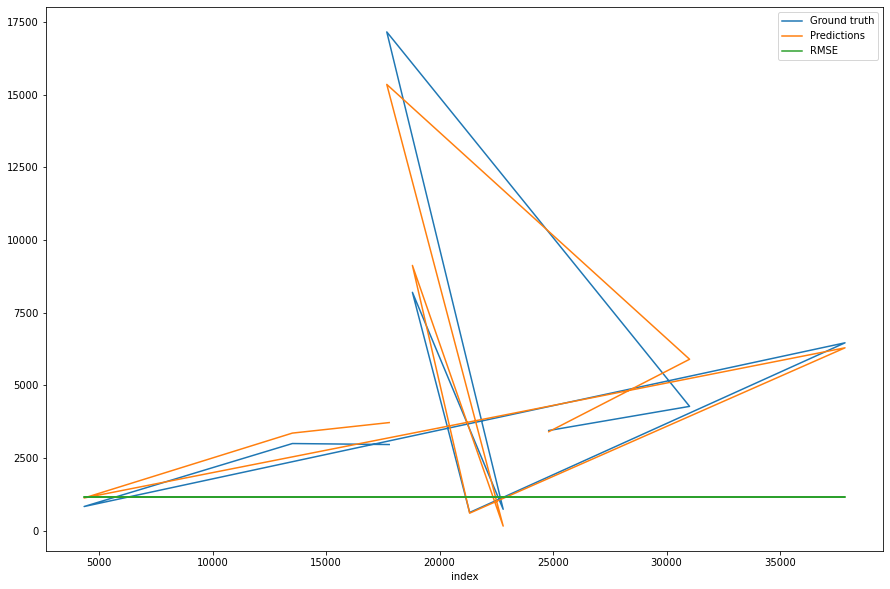

In [75]:
#Visual analysis

check = pd.DataFrame({'Ground truth':y_test2[:10],
                      'Predictions':predictions2[:10], 
                      'RMSE':rmse})
check.reset_index(inplace=True)
check.plot(x='index',
           y=['Ground truth', 'Predictions', 'RMSE'], 
           kind='line', 
           figsize=(15, 10)); 